# Tech Challenge - Fase 01

A descrição do desafio está dentro do arquivo [README.md](README.md).

### TODO

- Vídeo explicativo
- Aplicação Streamlit para simulação da predição

### Bibliotecas

Lista das bibliotecas utilizadas para o projeto.

### Vídeo explicativo

Abaixo o link do vídeo onde o grupo explica o desenvolvimento do desafio.

`COLOCAR O LINK AQUI`

In [64]:
# Para carregar e manipular os dados
import pandas as pd
import numpy as np

# Para treinamento dos modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


# Para validação dos modelos
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Para transformação dos dados
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler                             

# Define configurações dos gráficos

plt.style.use('ggplot')
sns.set_style('darkgrid')

### Obtenção dos dados

Foi feito uma pesquisa e encontramos um conjunto de dados de dados de [seguro de saúde](https://gist.github.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41).

O arquivo foi salvo em [dados/insurance.csv](dados/insurance.csv).


### Análise exploratória dos dados

Dicionário de dados:

- **age**: Variável que representa a idade da pessoa.
- **sex**: Variável que representa o gênero da pessoa (Masculino ou Feminino).
- **bmi**: Variável que representa o índice de massa corpórea (IMC) da pessoa.
- **children**: Variável que representa a quantidade de filhos que a pessoa tem e que são cobertos pelo plano de saúde.
- **smoker**: Variável que representa se a pessoa é fumante (Sim / Não).
- **region**: Variável que representa a região onde a pessoa mora.
- **charges**: Variável que representa o custo médico individual do plano.

In [65]:
# Carrega os dados
df = pd.read_csv('dados/insurance.csv')

# Lista das primeiras linhas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


O Dataset contém 1338 linhas e 7 colunas (variáveis).

In [66]:
# Verifica as dimensões do dataset
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Linhas: 1338
Colunas: 7


O dataset possui colunas que precisam ser convertidas para números, como:
- sex (variável do tipo inteiro)
- smoker (variável do tipo object)
- region (variável do tipo object)

In [67]:
# Verifica os tipos das colunas
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Conforme o resultado abaixo, não há dados ausentes.

In [68]:
# Verifica se ha dados ausentes
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [69]:
# Verifica os valores distintos de cada variável
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [70]:
# Verifica as informações do dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


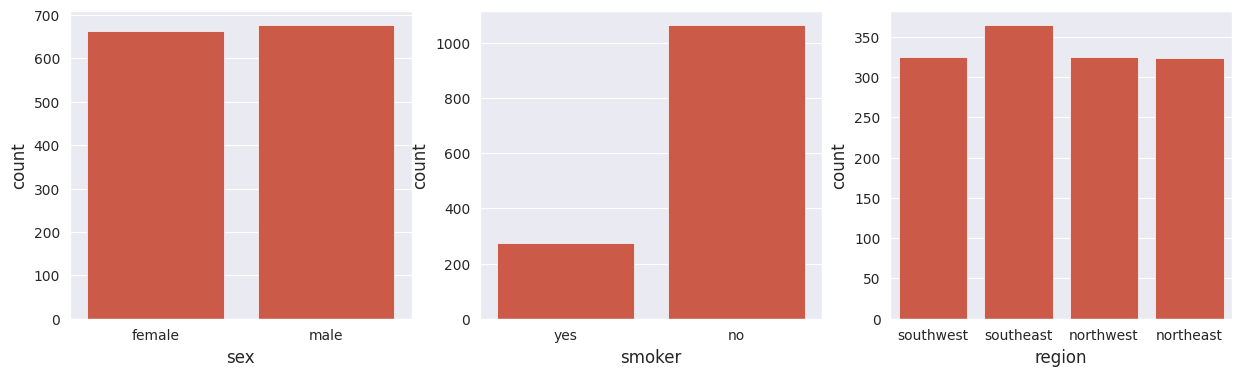

In [71]:
# Analise dos campos quantitativos
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=df)

plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=df)

plt.subplot(1, 3, 3)
sns.countplot(x='region', data=df)

plt.show()

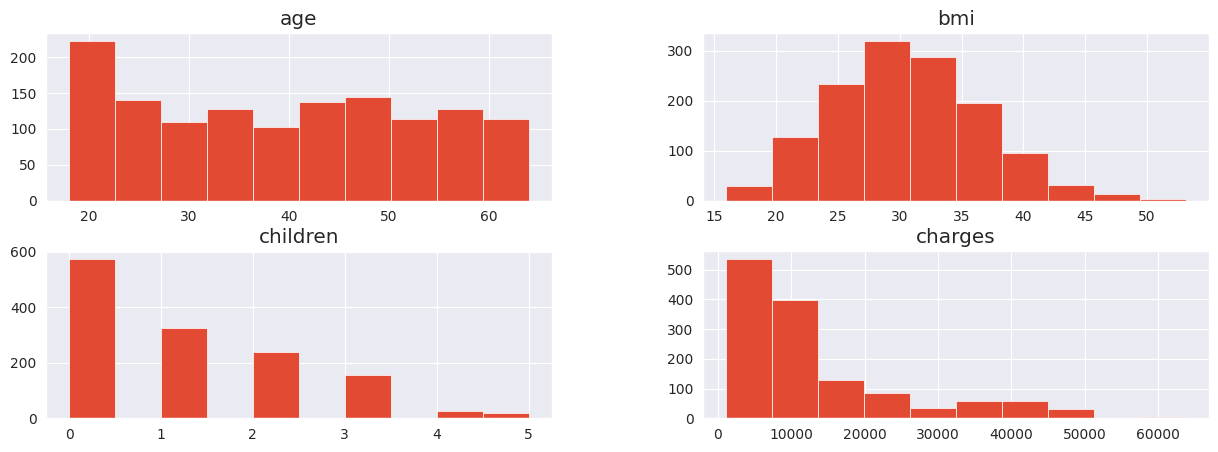

In [72]:
# Analise dos campos qualitativos

df.hist(figsize=(15, 5))
plt.show()

Avaliação preeliminar:

Fumantes vs Não Fumantes: O impacto do tabagismo nos custos de saúde é evidente, com os fumantes apresentando custos médios muito mais elevados. Isso destaca como o tabagismo pode ser um importante fator de risco, aumentando significativamente os encargos médicos.

Sexo: Não há uma diferença clara nos custos de saúde entre homens e mulheres, indicando que ambos têm riscos semelhantes que afetam seus custos de saúde de forma equilibrada.

Região: A localização geográfica tem um impacto limitado nos custos de saúde, com uma distribuição bastante uniforme entre as diferentes regiões. A exceção parece ser a região "southeast", que tem mais outliers.

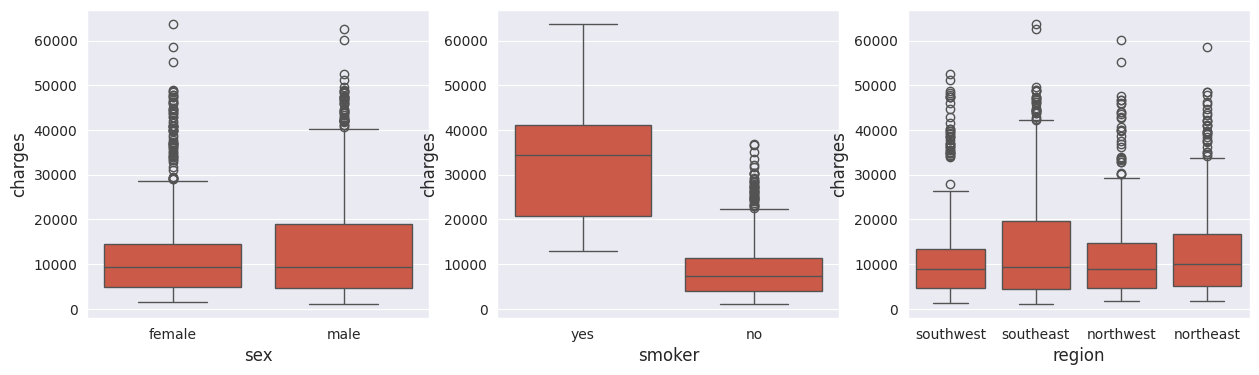

In [73]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)

plt.show()

Avaliação preeliminar:

A variável "charges" possui muitos outliers, o que pode ser indicativo de altos custos associados a uma pequena parte da população, possivelmente por problemas de saúde ou maior frequência de uso dos serviços.

A variável "bmi" mostra um padrão de sobrepeso/obesidade na amostra, o que pode estar relacionado aos custos elevados de saúde.

A distribuição da idade é razoavelmente simétrica, com a maior parte da população entre 30 e 50 anos, uma faixa etária geralmente ativa.


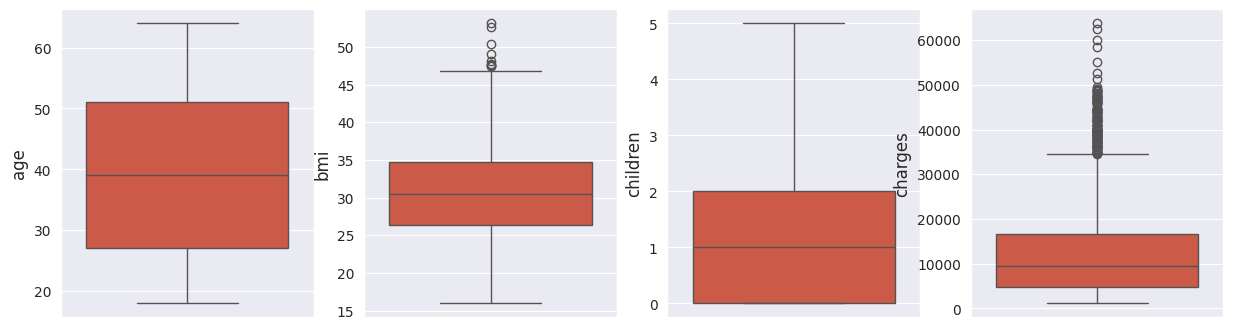

In [74]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
sns.boxplot(y='age', data=df)

plt.subplot(1, 4, 2)
sns.boxplot(y='bmi', data=df)

plt.subplot(1, 4, 3)
sns.boxplot(y='children', data=df)

plt.subplot(1, 4, 4)
sns.boxplot(y='charges', data=df)

plt.show()

In [75]:
# TODO: Verificar se iremos remover outliers

Análise da matriz de correlação

Até o momento, não há relação entre as colunas

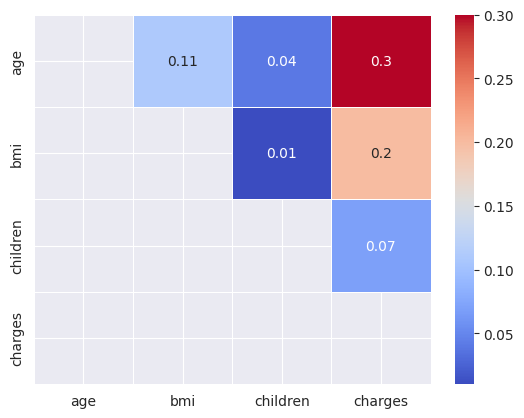

In [76]:
# Matriz de correlação
numeric_columns = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numeric_columns].corr().round(2)
mask = np.tril(df[numeric_columns].corr())
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm', mask=mask)

plt.show()

Transformando os dados categóricos para numéricos

In [77]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [78]:
# Converte a variável region para valores numéricos através da técnica OneHotEncoding
one_hot_region = OneHotEncoder(sparse_output=False)
region_encoded = one_hot_region.fit_transform(df[['region']])
df = pd.concat([df, pd.DataFrame(data=region_encoded, columns=one_hot_region.get_feature_names_out())], axis=1)
df.drop(columns=['region'], axis=1, inplace=True)

Análise da matriz de correlação após a transformação dos campos de sex e smoker

A princípio, há relação entre a variável de smoker e do valor das cobranças do seguro

Avaliação preeliminar:

Tabagismo é o principal fator associado ao aumento dos custos de saúde. A forte correlação entre "smoker" e "charges" sugere que políticas de saúde pública voltadas para a redução do tabagismo podem ter um impacto significativo na redução dos custos médicos.

Idade e BMI também estão correlacionados com custos de saúde, mas com menos intensidade. Isso indica que tanto o envelhecimento quanto o aumento do índice de massa corporal influenciam os custos médicos, mas de forma mais suave em comparação ao tabagismo.

As variáveis regionais e o número de filhos não parecem ter um impacto significativo nos custos de saúde.

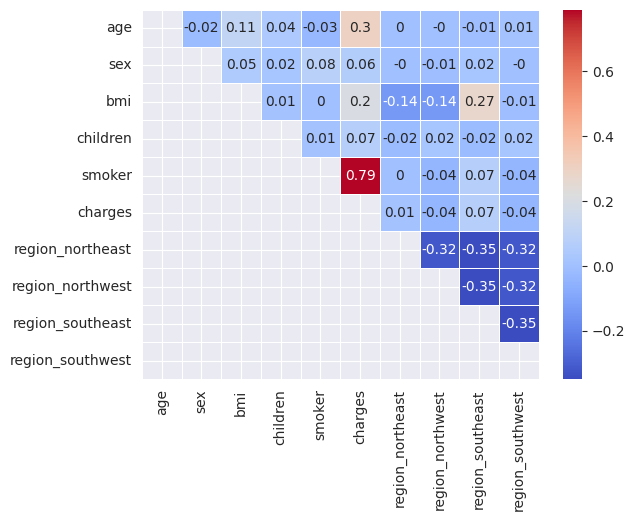

In [79]:
# Matriz de correlação
correlation_matrix = df.corr().round(2)
mask = np.tril(df.corr())
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm', mask=mask)

plt.show()

### Verificando melhor algoritmo com cross validation

In [80]:
#df = df[df['charges'] < 50000]

In [81]:
# Separa os dados entre variáveis preditoras e variável alvo
x = df.drop(columns=['charges'])
y = df['charges']

In [82]:
from sklearn.calibration import cross_val_predict


def run_models_with_cross_validation(models: list, x, y, n_splits=10):

    def get_model_results(model):
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Helper function to compute metrics
        def compute_metrics(y_true, y_pred):
            r2 = r2_score(y_true, y_pred)
            rmse = root_mean_squared_error(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)
            return r2, rmse, mae

        # Original data pipeline
        pipeline_original = Pipeline([
            ('model', model)
        ])
        y_pred_original = cross_val_predict(pipeline_original, x, y, cv=kfold)
        r2_original, rmse_original, mae_original = compute_metrics(y, y_pred_original)

        # StandardScaler pipeline
        pipeline_std = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        y_pred_std = cross_val_predict(pipeline_std, x, y, cv=kfold)
        r2_std, rmse_std, mae_std = compute_metrics(y, y_pred_std)

        # MinMaxScaler pipeline
        pipeline_mm = Pipeline([
            ('scaler', MinMaxScaler()),
            ('model', model)
        ])
        y_pred_mm = cross_val_predict(pipeline_mm, x, y, cv=kfold)
        r2_mm, rmse_mm, mae_mm = compute_metrics(y, y_pred_mm)

        return {
            'original': {'r2': r2_original, 'rmse': rmse_original, 'mae': mae_original},
            'std': {'r2': r2_std, 'rmse': rmse_std, 'mae': mae_std},
            'mm': {'r2': r2_mm, 'rmse': rmse_mm, 'mae': mae_mm}
        }

    results = []
    for name, model in models:
        print(f"Verifying {name}")
        model_results = get_model_results(model)

        results.append({
            'model': name,
            'r2_original': model_results['original']['r2'],
            'r2_std': model_results['std']['r2'],
            'r2_mm': model_results['mm']['r2'],
            'rmse_original': model_results['original']['rmse'],
            'rmse_std': model_results['std']['rmse'],
            'rmse_mm': model_results['mm']['rmse'],
            'mae_original': model_results['original']['mae'],
            'mae_std': model_results['std']['mae'],
            'mae_mm': model_results['mm']['mae']
        })

    df = pd.DataFrame(data=results)

    return df


In [83]:
df_results = run_models_with_cross_validation([
    ('LinearRegression', LinearRegression()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=4)),
    ('RandomForestRegressor', RandomForestRegressor(max_depth=4)),
    ('GradientBoostingRegressor', GradientBoostingRegressor()),
    ('KNeighborsRegressor', KNeighborsRegressor())
], x, y)

Verifying LinearRegression
Verifying DecisionTreeRegressor
Verifying RandomForestRegressor
Verifying GradientBoostingRegressor
Verifying KNeighborsRegressor


In [84]:
df_results.head()

,model,r2_original,r2_std,r2_mm,rmse_original,rmse_std,rmse_mm,mae_original,mae_std,mae_mm
0,LinearRegression,0.747396,0.746946,0.747578,6084.187209,6089.602692,6081.986751,4204.827492,4214.055366,4203.749467
1,DecisionTreeRegressor,0.849443,0.848986,0.849443,4697.134280,4704.259336,4697.134280,2723.251980,2723.251980,2723.251980
2,RandomForestRegressor,0.859493,0.858792,0.858951,4537.646161,4548.950744,4546.393771,2549.875111,2541.088745,2549.843663
3,GradientBoostingRegressor,0.859092,0.858868,0.858878,4544.119975,4547.725718,4547.578501,2495.350155,2493.704352,2496.591849
4,KNeighborsRegressor,0.133400,0.794098,0.772063,11269.156524,5493.030306,5779.492251,7756.328940,3351.668150,3546.195712


Esses resultados indicam que o modelo consegue explicar aproximadamente 78% da variabilidade dos custos médicos individuais, o que é um bom resultado para um problema com várias variáveis. Contudo, o MSE elevado indica que a magnitude dos erros ainda é considerável, principalmente devido à presença de alguns outliers.

### Treinamento do modelo escolhido: Random Forest

In [110]:
# Separa dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Linhas para treino: {len(X_train)}")
print(f"Linhas para teste: {len(X_test)}")

Linhas para treino: 1070
Linhas para teste: 268


In [165]:
# Aplica o escalonamento dos dados
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# Treinamento e prevendo os dados com base nas variáveis padronizadas
best_model = RandomForestRegressor(max_depth=5)
best_model.fit(X_train_std, y_train)

y_pred_std = best_model.predict(X_test_std)
r2_score(y_test, y_pred_std)

0.8737052870729863

In [166]:
# Padronizar / normalizar variáveis numéricas
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_mm = min_max_scaler.transform(X_train)
X_test_mm = min_max_scaler.transform(X_test)

# Treinamento e prevendo os dados com base nas variáveis normalizadas
best_model = RandomForestRegressor(max_depth=5)
best_model.fit(X_train_mm, y_train)
y_pred_mm = best_model.predict(X_test_mm)

r2_score(y_test, y_pred_mm)

0.8744397398663182

In [167]:
# Treinamento e prevendo os dados com base nas variáveis originais
best_model = RandomForestRegressor(max_depth=5)
best_model.fit(X_train, y_train)
y_pred_original = best_model.predict(X_test)

r2_score(y_test, y_pred_original)

0.8729199109232079

In [116]:
def plot_real_vs_pred(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Valores Reais dos Custos Médicos')
    plt.ylabel('Valores Previstos dos Custos Médicos')
    plt.title('Previsões vs. Valores Reais dos Custos Médicos')
    plt.show()

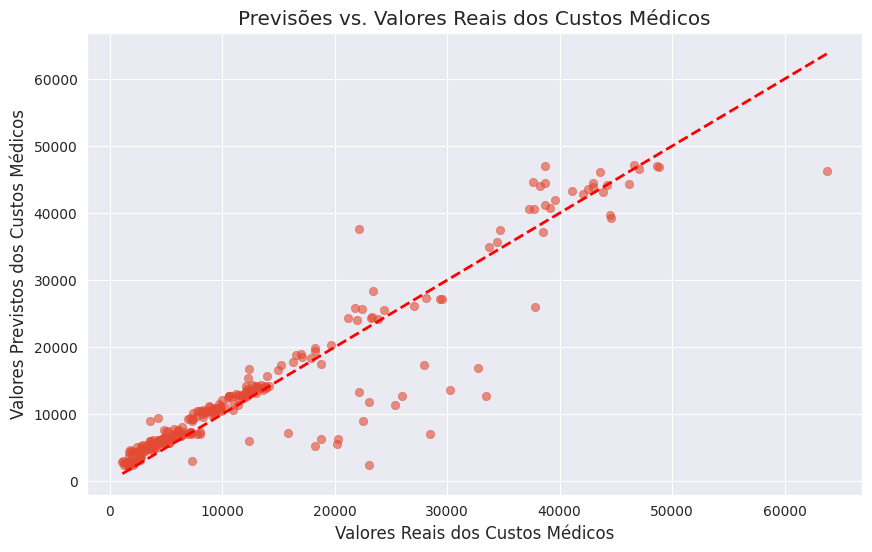

In [145]:
plot_real_vs_pred(y_test, y_pred_std)

In [146]:
r2 = r2_score(y_test, y_pred_std)
rmse = root_mean_squared_error(y_test, y_pred_std)
mae = mean_absolute_error(y_test, y_pred_std)

print (f'R2: {r2}')
print (f'RMSE: {rmse}')
print (f'MAE: {mae}')

R2: 0.8751930056393673
RMSE: 4401.832295282176
MAE: 2511.90767792705


In [159]:
df_errors = pd.DataFrame(zip(y_test, y_pred_std, np.abs(y_test - y_pred_std)), columns = ['y_test', 'y_pred', 'error'])
df_errors['pct_error'] = df_errors['error'] / df_errors['y_test']
df_errors.nlargest(10, 'pct_error')

,y_test,y_pred,error,pct_error
152,1146.7966,3081.975785,1935.179185,1.687465
29,1131.5066,2899.240911,1767.734311,1.562284
129,1837.2819,4653.675778,2816.393878,1.532913
46,3579.8287,9066.461606,5486.632906,1.532652
105,1727.5400,4373.940077,2646.400077,1.531889
123,1986.9334,4588.681309,2601.747909,1.309429
207,4296.2712,9384.517043,5088.245843,1.184340
51,1719.4363,3742.204603,2022.768303,1.176414
163,2396.0959,5148.007892,2751.911992,1.148498
144,2137.6536,4394.224881,2256.571281,1.055630


In [164]:
pct_error_mean = df_errors.pct_error.mean()
print('% erro médio:', pct_error_mean)
print('% acerto médio', 1 - pct_error_mean)

% erro médio: 0.30523426906365964
% acerto médio 0.6947657309363404


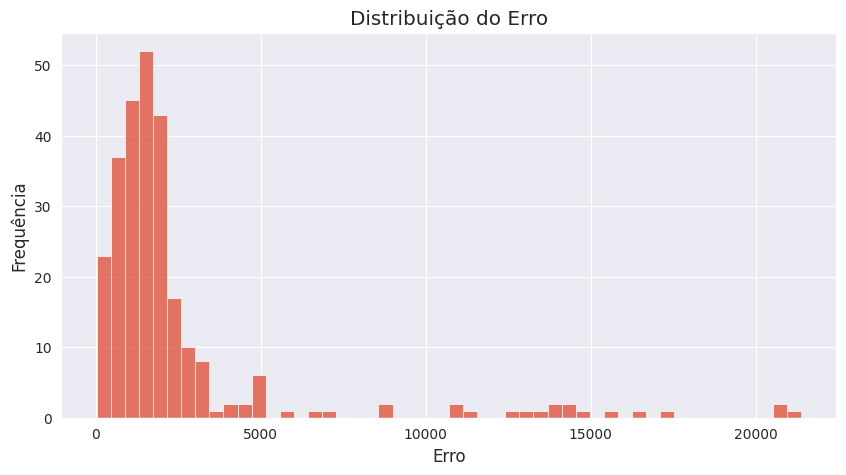

In [136]:
def plot_error_distribution(error):
    plt.figure(figsize=(10, 5))
    sns.histplot(error, bins=50)
    plt.xlabel('Erro')
    plt.ylabel('Frequência')
    plt.title('Distribuição do Erro')
    plt.show()
    
plot_error_distribution(df_errors['error'])

### Análise das métricas

Considerações sobre R² (Coeficiente de Determinação) = 0.8727

Significado: O coeficiente de determinação (R²) mede a proporção da variabilidade dos dados que é explicada pelo modelo. O valor varia de 0 a 1.

Interpretação: Um valor de R² = 0.8727 significa que cerca de 87,27% da variação nos valores da variável dependente (variável que você está tentando prever) pode 
ser explicada pelos recursos (features) usados no modelo. Isso indica que o modelo está capturando uma parte significativa da variação nos dados, mas ainda há cerca de 12,73% da variação que não é explicada pelo modelo.

Bom ou ruim?: Em muitos casos, um R² próximo de 0,87 é considerado um bom valor, dependendo do contexto. Se você estiver lidando com dados de natureza complexa, pode ser difícil atingir valores muito mais altos. Porém, se o objetivo for precisão alta, há espaço para melhorias.

### TODO

- Aplicar o Grid Search para verificar se conseguimos melhores resultados
- Validação estatística do modelo
- Criar um método para simular a previsão do valor (passando as variáveis reais por parâmetro e o método aplica o pipeline de transformação dos dados)

In [170]:
# Definir o modelo
from sklearn.model_selection import GridSearchCV



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Definir o pipeline com StandardScaler e RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])

# Definir a grade de parâmetros para buscar os melhores hiperparâmetros
param_grid = {
#  'rf__bootstrap': [True, False],
 'rf__max_depth': [None, 2, 3, 4, 5, 6, 7, 10],
 'rf__max_features': [1, 2, 3, 4, 5, 5, 7, 8, 9, 10],
 'rf__min_samples_leaf': [1, 2, 4],
 'rf__min_samples_split': [2, 5, 10],
#  'rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Treinar o modelo com a busca em grade
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

# Avaliar o modelo com os melhores parâmetros
y_pred = grid_search.best_estimator_.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("R2:", r2)

Melhores parâmetros encontrados: {'rf__max_depth': 4, 'rf__max_features': 8, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2}
RMSE 4341.676582310546
MAE 2525.8132089166816
R2: 0.871439082536062
